# Plot model population analysis
Code includes:
- Fig 3 panel a: model type performance overview: comparing performance with or without certain model filters for opto, run and eye data
- Fig 3 panel b: population filters

The figure panels are manually stored in the GDrive paper folder 'Hmov_L6S_paper/fig_sources/' and then inserted via Adobe Illustrator into Hmov_L6S_paper/figs/fig_03.ai

## TODO

## Setup

In [1]:
run -im djd.main -- --dbname=dj_lisa --user=write

Connecting write@huxley.neuro.bzm:3306
Connected to database 'dj_lisa' as 'write@10.153.173.165'


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import seaborn as sns

# from djd.hmov_models import _get_data
# from djd.hmov_unit import plot_multi_traces
from djd.glms import get_best_model, plot_model

# Automatically reload modules to get code changes without restarting kernel
# NOTE: Does not work for DJD table modules
%load_ext autoreload
%autoreload 2

### Set plot parameters

In [3]:
## Update plot parameters
# Option 1: Update general pars from modified matplotlibrc file
# plt.rcParams.update(mpl.rc_params_from_file('../../matplotlibrc', fail_on_error=False, use_default_template=True))

# Option 2: Dynamically update general pars (use if not updating from modified matplotlibrc)
plt.rcParams.update({
    'figure.dpi': 150,
    'figure.max_open_warning': 0, 
    'axes.linewidth': 0.5,
    'xtick.major.width': 0.5,
    'ytick.major.width': 0.5,
    'axes.labelsize': 'medium',
    'font.sans-serif': ['Arial'],
    'pdf.fonttype': 42, # make text editable (otherwise saved as non-text path/shape)
    'ps.fonttype': 42, # make text editable (otherwise saved as non-text path/shape)
    })


# Dynamically update plot-specific pars
plt.rcParams.update({
    'figure.dpi': 150,
    'figure.max_open_warning': 0,
    'font.size': 8,
    'axes.labelsize': 7.0,
    'axes.titlesize': 8,
    'legend.fontsize': 7,
    'xtick.labelsize': 7,
    'ytick.labelsize': 7,    
    })

In [4]:
# Make figure directory unless it already exists
fig_dir = os.path.join(os.getcwd(), 'figs')  # os.path.dirname(__file__) gives DJD path
if not os.path.exists(fig_dir):
    print(f"Making figure save directory: {fig_dir}")
    os.makedirs(fig_dir)

## Plot model type performance overview
- dimensions
  - old Fig2 version: 
    - row_length=2.75, col_length=3.375
    - makes 6.75 x 11 cm
  - vertical Fig3 version: 
    - row_length=3.75, col_length=3.75
    - makes 7.5 x 15 cm

Load model performances for: 
	Stimulus only
	Full model
	Stim+Opto
	Stim+Opto+Run
	Stim+Run
	Stim+Opto+Eye
	Stim+Eye
	Stim+Run+Eye


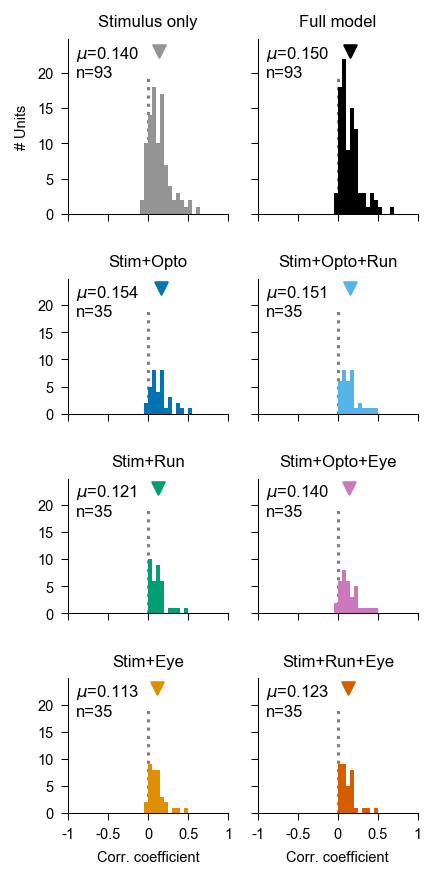

In [4]:
# Select units
keys_crit = HmovUnit().get_crit_set(fr_crit=0.1, opto=True, run=True, eye=True, excl_ctrl_m=True)

fig, axs = SplineLNP().plot_performance_overview(keys=keys_crit, pshf_config=False, eval_metric='r', 
                                                 colors=None, num_cols=2, row_length=3.75, col_length=3.75,
                                                 verbose=True, add_first_subplot_space=0.3)
fig.savefig('./figs/model_performance_overview_vert.pdf')

Load model performances for: 
	Stimulus only
	Opto
	Run
	Eye
	Full model
	Opto+Run
	Opto+Eye
	Run+Eye


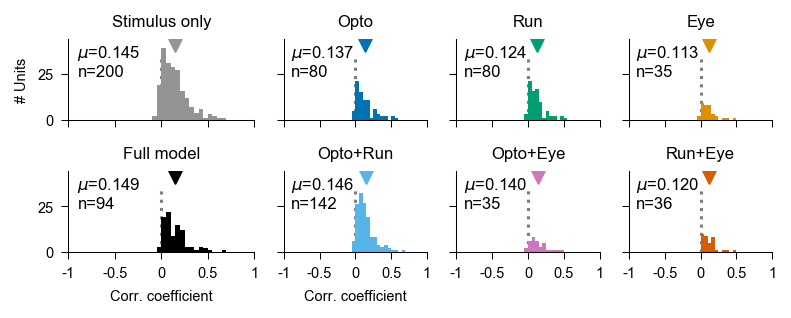

In [7]:
fig, axs = SplineLNP().plot_performance_overview(keys=None, pshf_config=False, eval_metric='r', 
                                                 colors=None, num_cols=4, row_length=2.75, col_length=3.375,
                                                 verbose=True, add_first_subplot_space=0.3)
fig.savefig('./figs/model_performance_overview_horiz.pdf')

## Plot model population filters
- dimensions
  - old Fig2 version: 
    - figsize=(3.25, 4.5)
  - vertical Fig3 version: 
    - figsize=(4, 3.5)

### Opto filters

#### Test diff opto filter lengths

Loading models of non-modulated units...
	Number of loaded units: 16
Loading models of modulated units...
	Number of loaded units: 14


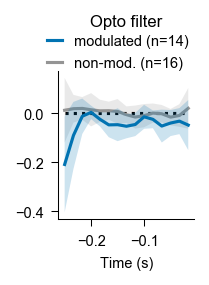

Loading models of non-modulated units...
	Number of loaded units: 70
Loading models of modulated units...
	Number of loaded units: 15


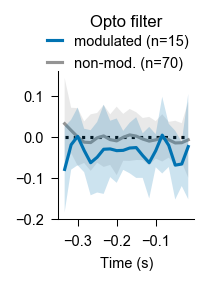

In [13]:
keys_crit = HmovUnit().get_crit_set(fr_crit=0.1, opto=True, run=True, eye=True, excl_ctrl_m=True)

thresh_upper = -0.2
thresh_lower = -1.0
fig, axs = (SplineLNP() & keys_crit).plot_filter_split_by_modulation(mi_kind='omi',
                                                                     filter_len=15,
                                                                     thresh_lower=thresh_lower,
                                                                     thresh_upper=thresh_upper,                                                                      
                                                                     zrange=[-.1, .1], 
                                                                     keys=keys_crit,                                                                                                                                          
                                                                     fr_crit=0.1, 
                                                                     pshf_config=False,
                                                                     data_fs=60, 
                                                                     verbose=True,
                                                                     figsize=(3.25, 4.5))
plt.show()

fig, axs = (SplineLNP() & keys_crit).plot_filter_split_by_modulation(mi_kind='omi',
                                                                     filter_len=20,
                                                                     thresh_lower=thresh_lower,
                                                                     thresh_upper=thresh_upper,                                                                      
                                                                     zrange=[-.1, .1], 
                                                                     keys=keys_crit,                                                                                                                                          
                                                                     fr_crit=0.1, 
                                                                     pshf_config=False,
                                                                     data_fs=60, 
                                                                     verbose=True,
                                                                     figsize=(3.25, 4.5))
plt.show()

# fig.savefig('./figs/model_population_filters_opto_02.pdf')

#### Opto filters for plot

Loading models of non-modulated units...
	Number of loaded units: 16
Loading models of modulated units...
	Number of loaded units: 14


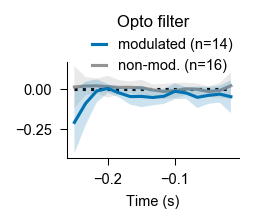

In [10]:
keys_crit = HmovUnit().get_crit_set(fr_crit=0.1, opto=True, run=True, eye=True, excl_ctrl_m=True)

thresh_upper = -0.2
thresh_lower = -1.0
fig, axs = (SplineLNP() & keys_crit).plot_filter_split_by_modulation(mi_kind='omi',
                                                                     filter_len=15,
                                                                     thresh_lower=thresh_lower,
                                                                     thresh_upper=thresh_upper,                                                                      
                                                                     zrange=[-.1, .1], 
                                                                     keys=keys_crit,                                                                                                                                          
                                                                     fr_crit=0.1, 
                                                                     pshf_config=False,
                                                                     data_fs=60, 
                                                                     verbose=True,
                                                                     figsize=(4, 3.5),
                                                                     leg_yshift=-0.18)


fig.savefig('./figs/model_population_filters_opto_02.pdf')

Loading models of non-modulated units...
	Number of loaded units: 16
Loading models of modulated units...
	Number of loaded units: 14


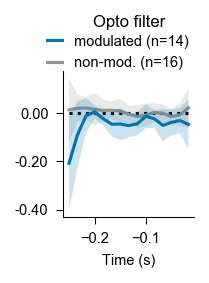

In [4]:
keys_crit = HmovUnit().get_crit_set(fr_crit=0.1, opto=True, run=True, eye=True, excl_ctrl_m=True)

thresh_upper = -0.2
thresh_lower = -1.0
fig, axs = (SplineLNP() & keys_crit).plot_filter_split_by_modulation(mi_kind='omi',
                                                                     filter_len=15,
                                                                     thresh_lower=thresh_lower,
                                                                     thresh_upper=thresh_upper,                                                                      
                                                                     zrange=[-.1, .1], 
                                                                     keys=keys_crit,                                                                                                                                          
                                                                     fr_crit=0.1, 
                                                                     pshf_config=False,
                                                                     data_fs=60, 
                                                                     verbose=True,
                                                                     figsize=(3.25, 4.5))


fig.savefig('./figs/model_population_filters_opto.pdf')

### Run filters

#### Test diff run filter lengths

Loading models of non-modulated units...
	Number of loaded units: 10
Loading models of modulated units...
	Number of loaded units: 14


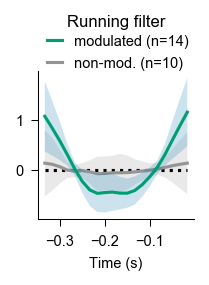

Loading models of non-modulated units...
	Number of loaded units: 37
Loading models of modulated units...
	Number of loaded units: 27


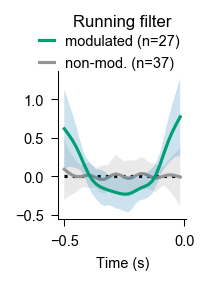

Loading models of non-modulated units...
	Number of loaded units: 37
Loading models of modulated units...
	Number of loaded units: 27


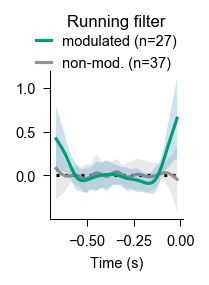

Loading models of non-modulated units...
	Number of loaded units: 37
Loading models of modulated units...
	Number of loaded units: 27


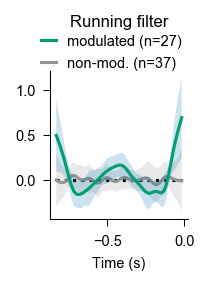

In [11]:
keys_crit = HmovUnit().get_crit_set(fr_crit=0.1, opto=True, run=True, eye=True, excl_ctrl_m=True)

thresh_upper=1.0
thresh_lower=0.2

fig, axs = (SplineLNP() & keys_crit).plot_filter_split_by_modulation(mi_kind='rmi',
                                                                     filter_len=20,
                                                                     thresh_lower=thresh_lower,
                                                                     thresh_upper=thresh_upper,                                                                      
                                                                     zrange=[-.1, .1], 
                                                                     keys=keys_crit,                                                                                                                                          
                                                                     fr_crit=0.1, 
                                                                     pshf_config=False,
                                                                     data_fs=60, 
                                                                     verbose=True,
                                                                     figsize=(3.25, 4.5))
plt.show()

fig, axs = (SplineLNP() & keys_crit).plot_filter_split_by_modulation(mi_kind='rmi',
                                                                     filter_len=30,
                                                                     thresh_lower=thresh_lower,
                                                                     thresh_upper=thresh_upper,                                                                      
                                                                     zrange=[-.1, .1], 
                                                                     keys=keys_crit,                                                                                                                                          
                                                                     fr_crit=0.1, 
                                                                     pshf_config=False,
                                                                     data_fs=60, 
                                                                     verbose=True,
                                                                     figsize=(3.25, 4.5))
plt.show()

fig, axs = (SplineLNP() & keys_crit).plot_filter_split_by_modulation(mi_kind='rmi',
                                                                     filter_len=40,
                                                                     thresh_lower=thresh_lower,
                                                                     thresh_upper=thresh_upper,                                                                      
                                                                     zrange=[-.1, .1], 
                                                                     keys=keys_crit,                                                                                                                                          
                                                                     fr_crit=0.1, 
                                                                     pshf_config=False,
                                                                     data_fs=60, 
                                                                     verbose=True,
                                                                     figsize=(3.25, 4.5))
plt.show()

fig, axs = (SplineLNP() & keys_crit).plot_filter_split_by_modulation(mi_kind='rmi',
                                                                     filter_len=50,
                                                                     thresh_lower=thresh_lower,
                                                                     thresh_upper=thresh_upper,                                                                      
                                                                     zrange=[-.1, .1], 
                                                                     keys=keys_crit,                                                                                                                                          
                                                                     fr_crit=0.1, 
                                                                     pshf_config=False,
                                                                     data_fs=60, 
                                                                     verbose=True,
                                                                     figsize=(3.25, 4.5))
plt.show()
# fig.savefig('./figs/model_population_filters_run.pdf')

#### Run filters for plot

Loading models of non-modulated units...
	Number of loaded units: 10
Loading models of modulated units...
	Number of loaded units: 14


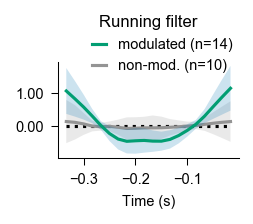

In [5]:
keys_crit = HmovUnit().get_crit_set(fr_crit=0.1, opto=True, run=True, eye=True, excl_ctrl_m=True)

thresh_upper=1.0
thresh_lower=0.2

fig, axs = (SplineLNP() & keys_crit).plot_filter_split_by_modulation(mi_kind='rmi',
                                                                     filter_len=20,
                                                                     thresh_lower=thresh_lower,
                                                                     thresh_upper=thresh_upper,                                                                      
                                                                     zrange=[-.1, .1], 
                                                                     keys=keys_crit,                                                                                                                                          
                                                                     fr_crit=0.1, 
                                                                     pshf_config=False,
                                                                     data_fs=60, 
                                                                     verbose=True,
                                                                     figsize=(4, 3.5),
                                                                     leg_yshift=-0.18)
fig.savefig('./figs/model_population_filters_run_02.pdf')

Loading models of non-modulated units...
	Number of loaded units: 10
Loading models of modulated units...
	Number of loaded units: 14


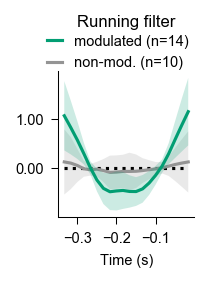

In [5]:
keys_crit = HmovUnit().get_crit_set(fr_crit=0.1, opto=True, run=True, eye=True, excl_ctrl_m=True)

thresh_upper=1.0
thresh_lower=0.2

fig, axs = (SplineLNP() & keys_crit).plot_filter_split_by_modulation(mi_kind='rmi',
                                                                     filter_len=20,
                                                                     thresh_lower=thresh_lower,
                                                                     thresh_upper=thresh_upper,                                                                      
                                                                     zrange=[-.1, .1], 
                                                                     keys=keys_crit,                                                                                                                                          
                                                                     fr_crit=0.1, 
                                                                     pshf_config=False,
                                                                     data_fs=60, 
                                                                     verbose=True,
                                                                     figsize=(3.25, 4.5))
fig.savefig('./figs/model_population_filters_run.pdf')

### Eye filters

#### Eye filters for plot

Loading models of non-modulated units...
	Number of loaded units: 44
Loading models of modulated units...
	Number of loaded units: 8


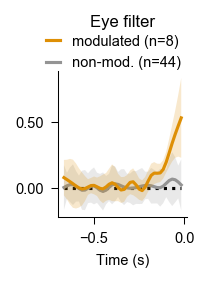

In [4]:
keys_crit = HmovUnit().get_crit_set(fr_crit=0.1, opto=True, run=True, eye=True, excl_ctrl_m=True)

thresh_upper=1.0
thresh_lower=0.35


fig, axs = (SplineLNP() & keys_crit).plot_filter_split_by_modulation(mi_kind='emi',
                                                                     filter_len=40,
                                                                     thresh_lower=thresh_lower,
                                                                     thresh_upper=thresh_upper,                                                                      
                                                                     zrange=[-.1, .1], 
                                                                     keys=keys_crit,                                                                                                                                          
                                                                     fr_crit=0.1, 
                                                                     pshf_config=False,
                                                                     data_fs=60, 
                                                                     verbose=True,
                                                                     figsize=(3.25, 4.5))
fig.savefig('./figs/model_population_filters_eye.pdf')